In [94]:
#df_train=pd.read_csv(r"C:\Users\School\Desktop\Datasets\Logistic regression\Log Reg Data\Titanictrain.csv")

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [96]:
df_train=pd.read_csv(r"C:\Users\School\Desktop\Datasets\Logistic regression\Log Reg Data\Titanictrain.csv")

In [97]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
df_train.shape

(891, 12)

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
df_train.Age.mean()

29.69911764705882

In [104]:
df_train['Age'].fillna(df_train.Age.mean(),inplace=True)

In [105]:
df_train['Age'].isna().sum()

0

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [107]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
df_train.drop('Cabin', axis=1, inplace=True)

In [109]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [110]:
df_train.dropna(inplace=True)

In [111]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
df_train.shape

(889, 11)

In [113]:
df_test=pd.read_csv(r"C:\Users\School\Desktop\Datasets\Logistic regression\Log Reg Data\Titanictest.csv")

In [114]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


In [115]:
import seaborn as sns

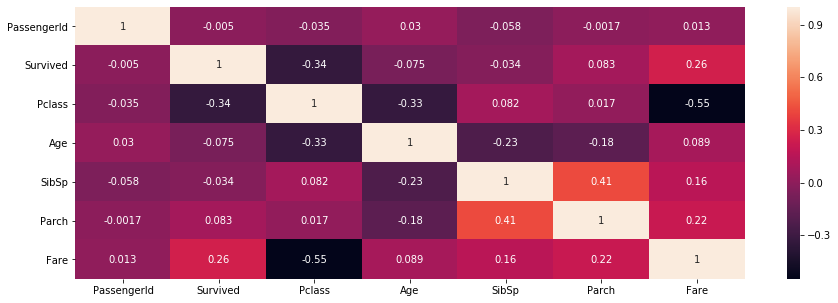

In [116]:
plt.figure(figsize=(15,5))
sns.heatmap(df_train.corr(),annot=True)

In [117]:
pd.get_dummies(df_train['Gender']).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


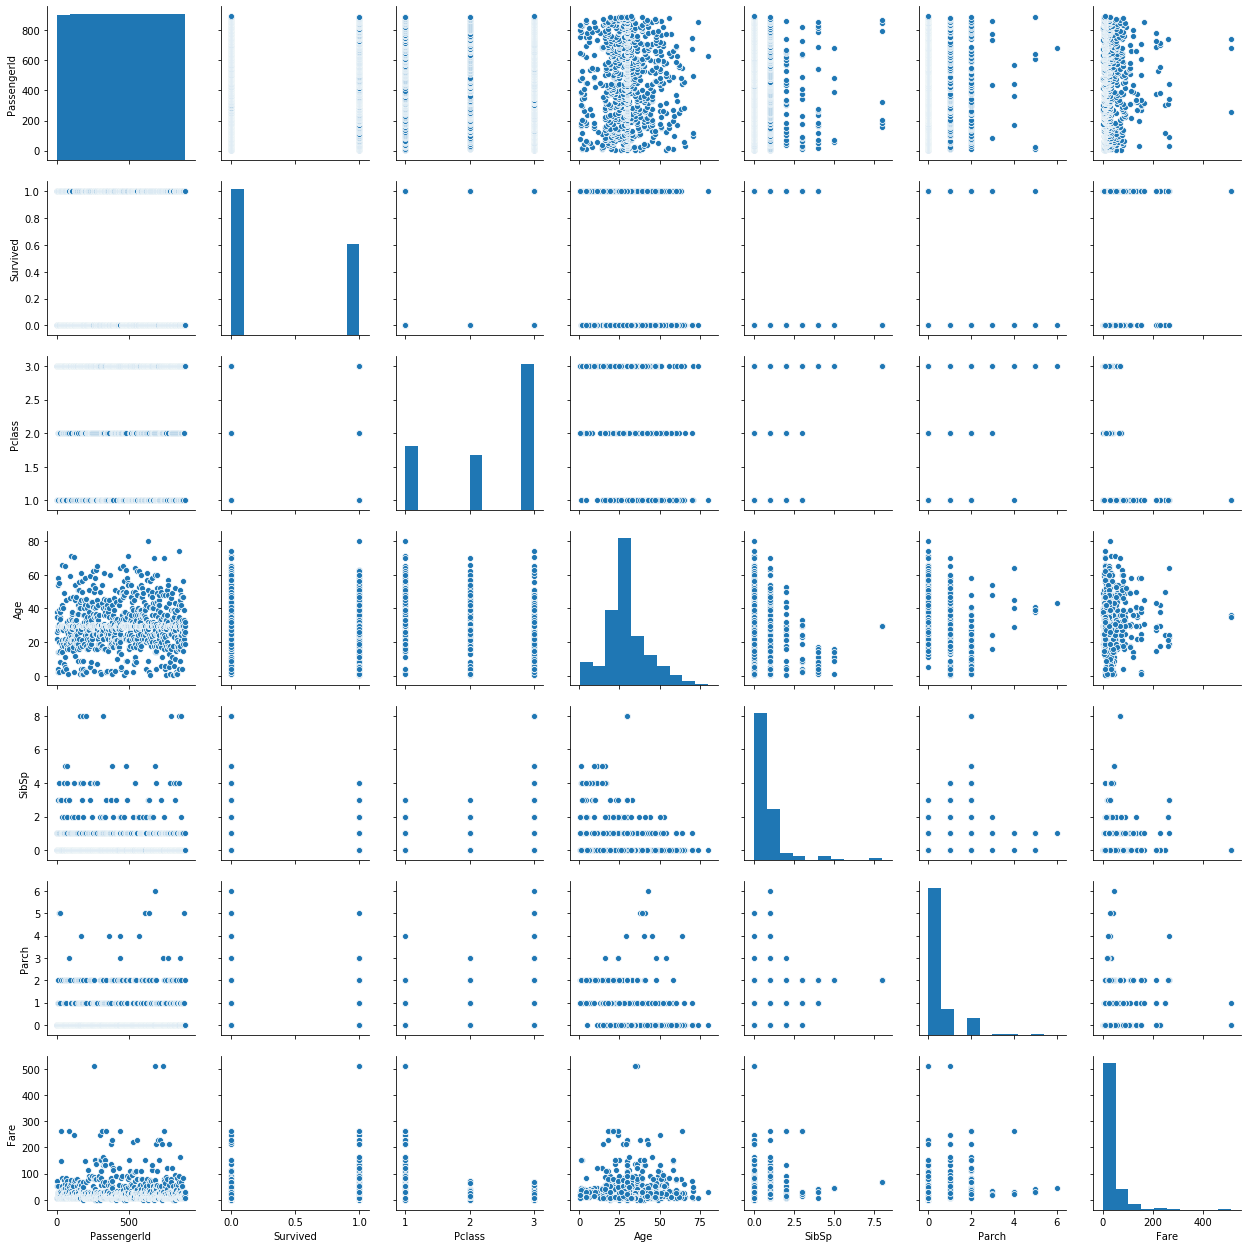

In [118]:
sns.pairplot(df_train)

In [119]:
pd.get_dummies(df_train['Gender']).head(10)
pd.get_dummies(df_train['Gender'], drop_first=True).head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [120]:
pd.get_dummies(df_train['Embarked']).head(10)
pd.get_dummies(df_train['Embarked'], drop_first=True).head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [121]:
Gender = pd.get_dummies(df_train['Gender'], prefix='Gender', drop_first=True)

In [122]:
embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked', drop_first=True)

In [123]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [124]:
Gender.head(2)

,Gender_male
0,1
1,0


In [125]:
embarked.head(2)

,Embarked_Q,Embarked_S
0,0,1
1,0,0


In [126]:
df_train = pd.concat([df_train, Gender, embarked], axis=1)

In [127]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [128]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [129]:
df_train.drop(['PassengerId', 'Name', 'Gender', 'Ticket',  'Embarked'], inplace=True, axis=1)      

In [130]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [131]:
df_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
#build a list of Independent Column names ""''Except survived all other columns"''

# build a list of Dependent columns names '''''' Survied is being Predicted"''


feature_columns = ['Pclass', 'SibSp', 'Age', 'Parch', 'Fare', 'Gender_male', 'Embarked_Q', 'Embarked_S']

In [134]:
X = df_train[feature_columns]

In [135]:
Y=df_train['Survived']

In [136]:
from sklearn.model_selection import train_test_split


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.30)

In [155]:
X.shape

(889, 8)

In [156]:
Y.shape

(889,)

In [157]:
df_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [158]:
logmodel = LogisticRegression()

In [159]:
logmodel.fit(X_train, y_train)

C:\Users\School\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [161]:
logmodel.intercept_

array([3.74857623])

In [162]:
logmodel.coef_

array([[-0.69864496, -0.35006989, -0.02950989, -0.04402628,  0.00590116,
        -2.40056722, -0.1648522 , -0.35612886]])

In [163]:
predictions_test

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [164]:
logmodel.predict(X_train)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [165]:
X_train.head(5)

,Pclass,SibSp,Age,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
486,1,1,35.0,0,90.0000,0,0,1
293,3,0,24.0,0,8.8500,0,0,1
173,3,0,21.0,0,7.9250,1,0,1
450,2,1,36.0,2,27.7500,1,0,1
361,2,1,29.0,0,27.7208,1,0,0


In [166]:
# to change the threshold predictions 

logmodel.predict_proba(X_train)

array([[0.13681602, 0.86318398],
       [0.34513344, 0.65486656],
       [0.84250631, 0.15749369],
       ...,
       [0.19304572, 0.80695428],
       [0.47714972, 0.52285028],
       [0.88358348, 0.11641652]])

In [167]:
logmodel.predict_proba(X_train)[:,1]

array([0.86318398, 0.65486656, 0.15749369, 0.14904245, 0.251326  ,
       0.50835918, 0.20882362, 0.16139248, 0.16991171, 0.0646004 ,
       0.73105646, 0.14243544, 0.2162315 , 0.41218125, 0.90516724,
       0.5757592 , 0.90026423, 0.20807387, 0.65878127, 0.15759159,
       0.87158889, 0.29174064, 0.3949608 , 0.16144903, 0.8358918 ,
       0.66664038, 0.30532888, 0.27007344, 0.74431845, 0.63880979,
       0.15251884, 0.65719317, 0.52715601, 0.10695996, 0.13530826,
       0.61411635, 0.24499959, 0.64144125, 0.87218661, 0.71965095,
       0.78867388, 0.01144537, 0.58728902, 0.72556672, 0.77518603,
       0.5996038 , 0.18439495, 0.80805355, 0.79802834, 0.541165  ,
       0.82752565, 0.52262563, 0.40693708, 0.11911193, 0.23103888,
       0.15739584, 0.11693092, 0.35820062, 0.17055727, 0.19689677,
       0.51478111, 0.58728902, 0.12632196, 0.17624331, 0.53440974,
       0.31194251, 0.30465699, 0.8256997 , 0.29066006, 0.4228063 ,
       0.12638683, 0.65878127, 0.13586375, 0.16154892, 0.27909

In [168]:
np.where(logmodel.predict_proba(X_train)[:,1]>0.7, 1,0)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [153]:
np.where(logmodel.predict_proba(X_train)[:,1]>0.9, 1,0)

# Increase threshold to 90%

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
from sklearn.metrics import roc_curve, auc, confusion_matrix,\
classification_report, accuracy_score

In [171]:
print(classification_report(y_train, predictions_train))
print("Accuracy:", accuracy_score(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       382
           1       0.77      0.69      0.73       240

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.79       622
weighted avg       0.80      0.80      0.80       622

Accuracy: 0.8006430868167203


In [172]:
print(classification_report(y_test, predictions_test))
print("Accuracy:", accuracy_score(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       167
           1       0.73      0.69      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

Accuracy: 0.7902621722846442


In [176]:
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=predictions_train)

In [177]:
cm=pd.DataFrame(cnf_matrix)

In [178]:
cm

,0,1
0,332,50
1,74,166


In [179]:
sns.set(font_scale=1.5)

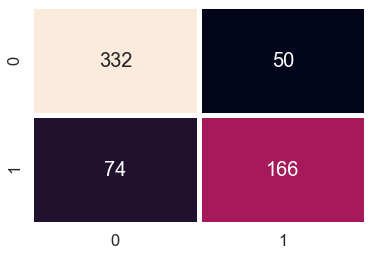

In [198]:
sns.heatmap(cm, annot=True, fmt ='g', annot_kws={"size":20},cbar=False, linewidth=4)

In [181]:
FPR, TPR, _ = roc_curve(y_train, predictions_train)

In [182]:
FPR1, TPR1, _1 = roc_curve(y_test, predictions_test)

In [183]:
roc_auc = auc(FPR, TPR)
print('ROC AUC: %0.3f' % roc_auc)

ROC AUC: 0.780


In [184]:
roc_auc1 = auc(FPR1, TPR1)
print('ROC AUC: %0.3f' % roc_auc1)

ROC AUC: 0.770


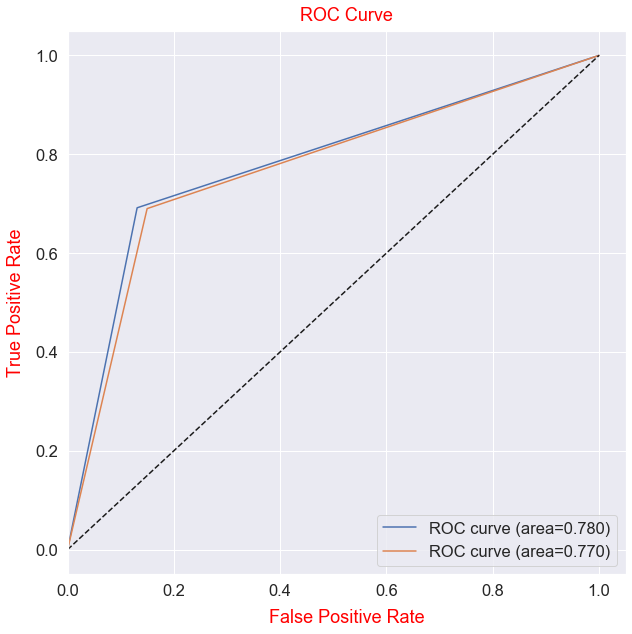

In [195]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR , label='ROC curve (area=%0.3f)' % roc_auc)
plt.plot(FPR1, TPR1 , label='ROC curve (area=%0.3f)' % roc_auc1)
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.05, 1.0)
plt.xlim(0.0, 1.05)
plt.xlabel('False Positive Rate', color='red',labelpad=10)
plt.ylabel('True Positive Rate', color='red',labelpad=10 )
plt.title('ROC Curve', color='red', pad=10)
plt.legend(loc="lower right")
plt.show()

In [200]:
import statsmodels.api as sm

In [204]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [205]:
feature_cols=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender_male', 'Embarked_Q', 'Embarked_S']    

In [206]:
X2=df_train[feature_cols]
Y2=df_train['Survived']

In [207]:
logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496464
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Fri, 18 Oct 2019   Pseudo R-squ.:                  0.2537
Time:                        12:27:00   Log-Likelihood:                -441.36
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 5.744e-61
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass          0.0338      0.086      0.394      0.694      -0.135       0.202
Age             0.0041    

In [ ]:
# in the above model select all the columns that have a good correlation coefficient 

In [ ]:
# Trying to divide

In [209]:
# yugandhar 
# sarvesh 
# vedasree

# Control / will comment all the selected lines 